In [1]:
import tensorflow as tf

In [3]:
img_rows,img_cols = 224,224

In [5]:
from tvm.contrib.download import download_testdata
# from PIL import Image
import numpy as np
import cv2
# image_url = "https://github.com/dmlc/mxnet.js/blob/main/data/cat.png?raw=true"
# image_path = download_testdata(image_url, "cat.png", module="data")
image_path = "/home/jd/workspace/mozer-example/native/example_pipeline/treefrog.jpg"
resized_image = cv2.resize(cv2.imread(image_path), [224, 224])
# resized_image = Image.open(image_path).resize((224, 224))

In [7]:
resized_image.shape

(224, 224, 3)

In [9]:
image_data = np.asarray(resized_image).astype("float32")
image_data = np.expand_dims(image_data, axis=0)
image_data[:, :, :, 0] = 2.0 / 255.0 * image_data[:, :, :, 0] - 1
image_data[:, :, :, 1] = 2.0 / 255.0 * image_data[:, :, :, 1] - 1
image_data[:, :, :, 2] = 2.0 / 255.0 * image_data[:, :, :, 2] - 1

# image_data = np.asarray(resized_image)[np.newaxis, :].astype("float32")
# image_data = preprocess_input(image_data).transpose([0, 2, 1, 3])

result = net(image_data)

2022-12-31 14:30:59.717794: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8204


In [10]:
# Convert result to 1D data
predictions = np.squeeze(result)

# Get top 1 prediction
prediction = np.argmax(predictions)

In [11]:
predictionss = np.argsort(predictions)[::-1][:3]

In [12]:
prediction

31

In [13]:
predictionss

array([31, 32, 47])

In [14]:
label_file_url = "".join(
    [
        "https://raw.githubusercontent.com/leferrad/tensorflow-mobilenet/master/imagenet/labels.txt",
    ]
)
label_file = "labels_mobilenet_quant_v1_224.txt"
label_path = download_testdata(label_file_url, label_file, module="data")

# List of 1001 classes
with open(label_path) as f:
    labels = f.readlines()

    

In [15]:
[labels[e] for e in predictionss]

['bullfrog\n', 'tree frog\n', 'green lizard\n']

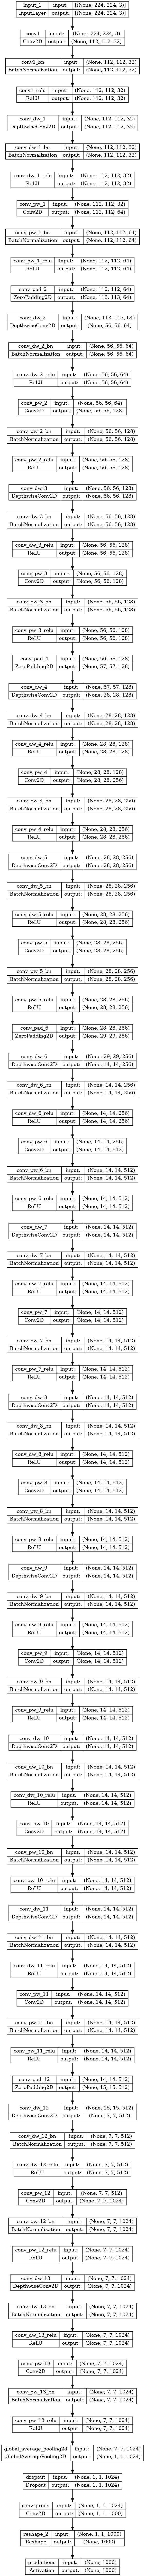

In [5]:
from keras.utils.vis_utils import plot_model
plot_model(net, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [27]:
img_rows,img_cols = 224,224
net = tf.keras.applications.ResNet152(weights='imagenet', input_shape=(img_rows, img_cols, 3))

242900224/242900224 [==============================] - 13s 0us/step


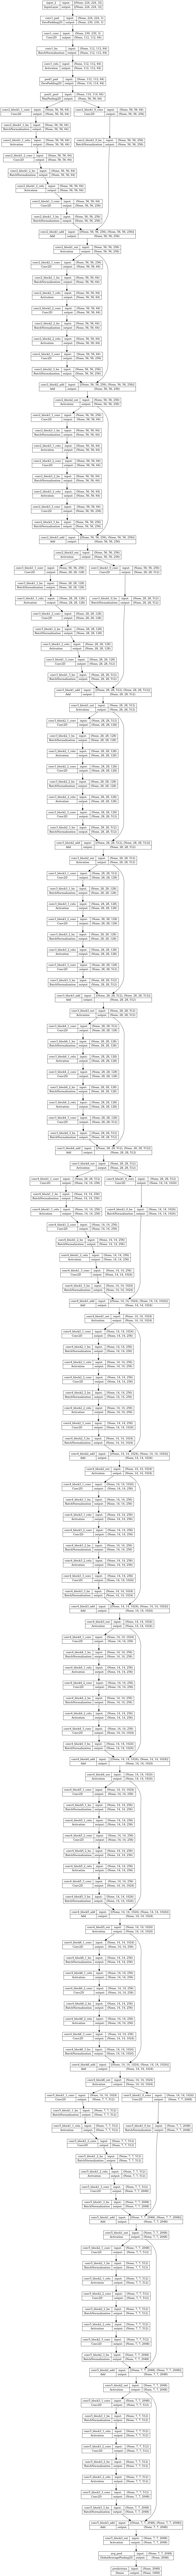

In [7]:
# plot_model(net, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [12]:
# resnet50
len(net.layers)

177

In [28]:
# resnet152
len(net.layers)

517

In [14]:
# mobilenet
len(net.layers)

91

In [17]:
# mobilenet v2
len(net.layers)

156

In [21]:
# mobilenet v3 small
len(net.layers)

239

In [24]:
# VGG16
len(net.layers)

23

In [26]:
# EfficientNet
len(net.layers)

241